# Harris vs. Trump Debate - September 2024

In [ ]:
pip install pandas nltk matplotlib

# Bigrams

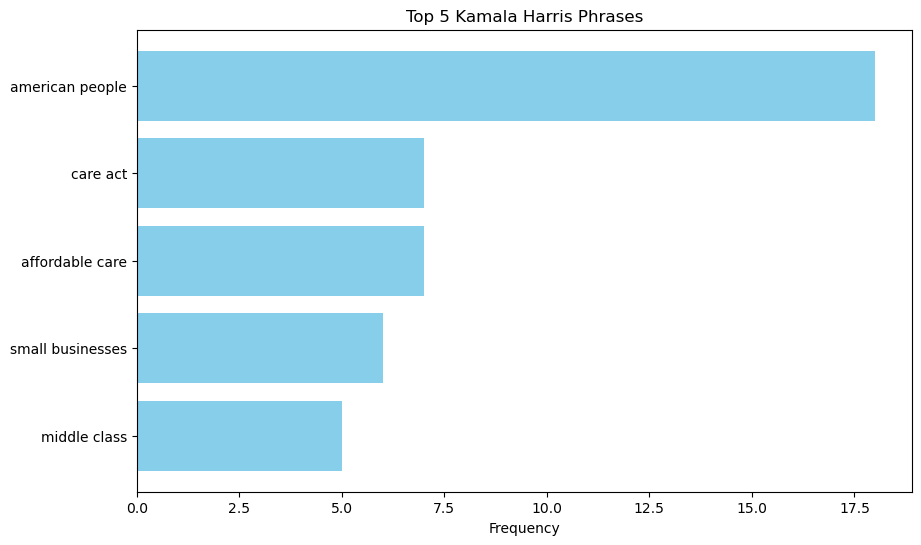

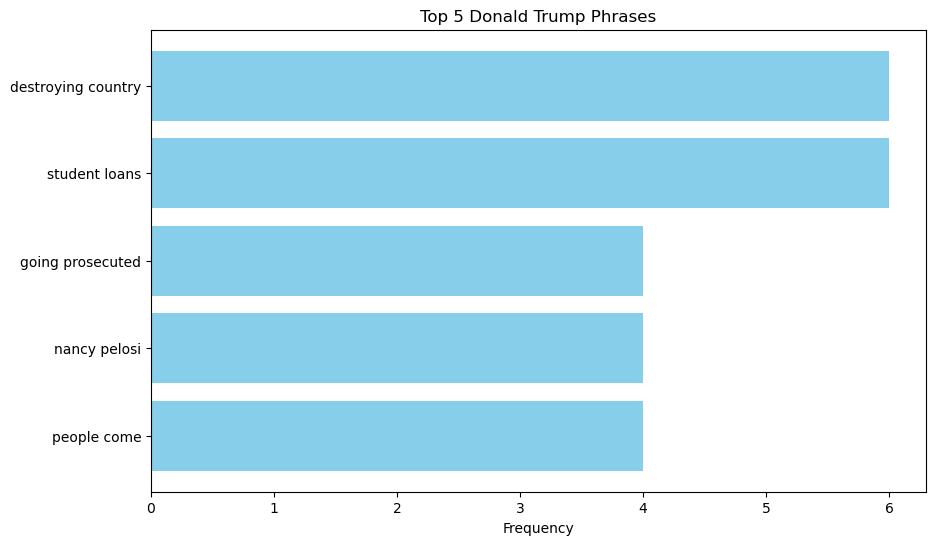

In [91]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'YOUR CSV FILE HERE'
df = pd.read_csv(file_path)

# Separate text for each speaker
harris_text = ' '.join(df[df['speaker'] == 'KAMALA HARRIS']['text'].astype(str))
trump_text = ' '.join(df[df['speaker'] == 'DONALD TRUMP']['text'].astype(str))

# List of specific phrases to exclude
excluded_phrases = [
    "donald trump", 
    "united states", 
    "vice president", 
    "president united", 
    "let talk",
    "millions people",
    'years ago',
    'don know',
    'billions dollars',
    'history country',
    've seen',
    'come country',
    'people don',
    'think going'
]
    
# Function to generate and visualize collocations
def plot_collocations(text, title, n=15, ngram_range=(2, 2)):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform([text])
    ngram_counts = ngrams.toarray().sum(axis=0)
    ngram_names = vectorizer.get_feature_names_out()
    
    # Create DataFrame with ngram counts
    ngram_freq = pd.DataFrame({'phrase': ngram_names, 'count': ngram_counts})
    
   # Filter out unwanted phrases
    ngram_freq = ngram_freq[~ngram_freq['phrase'].isin(excluded_phrases)]

    # Ensure the DataFrame is not empty
    if not ngram_freq.empty:
        # Sort by frequency and select the top phrases
        ngram_freq = ngram_freq.sort_values(by='count', ascending=False).head(n)
     
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_freq['phrase'], ngram_freq['count'], color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top {n} {title} Phrases')
    plt.gca().invert_yaxis()
    plt.savefig(f'{title.replace(" ", "_")}_top_{n}_bigrams.png', bbox_inches='tight')
    plt.show()

# Plot top bigrams for each speaker
plot_collocations(harris_text, 'Kamala Harris', n=5, ngram_range=(2, 2))
plot_collocations(trump_text, 'Donald Trump', n=5, ngram_range=(2, 2))
